In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Advertising (2).csv')

In [8]:
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df.index


RangeIndex(start=0, stop=200, step=1)

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: xlabel='TV', ylabel='Sales'>

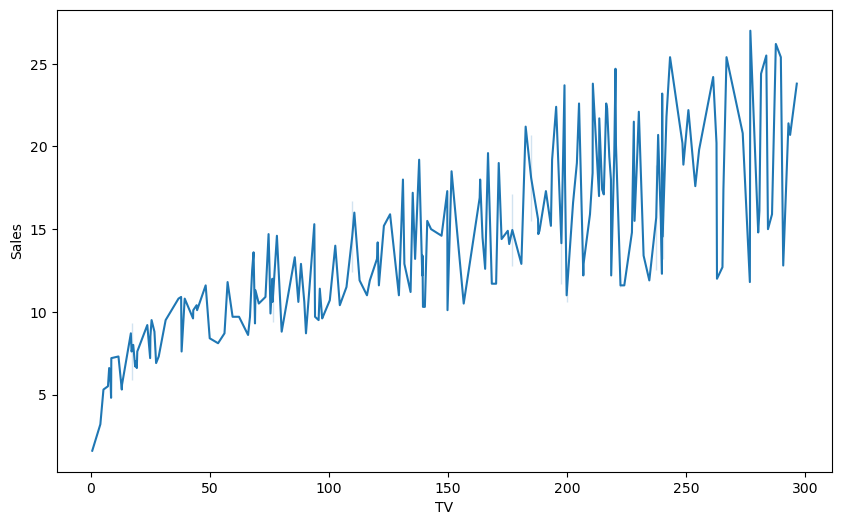

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TV',y='Sales', data=df)

In [15]:
df[df[df.duplicated()]]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='TV', ylabel='Sales'>

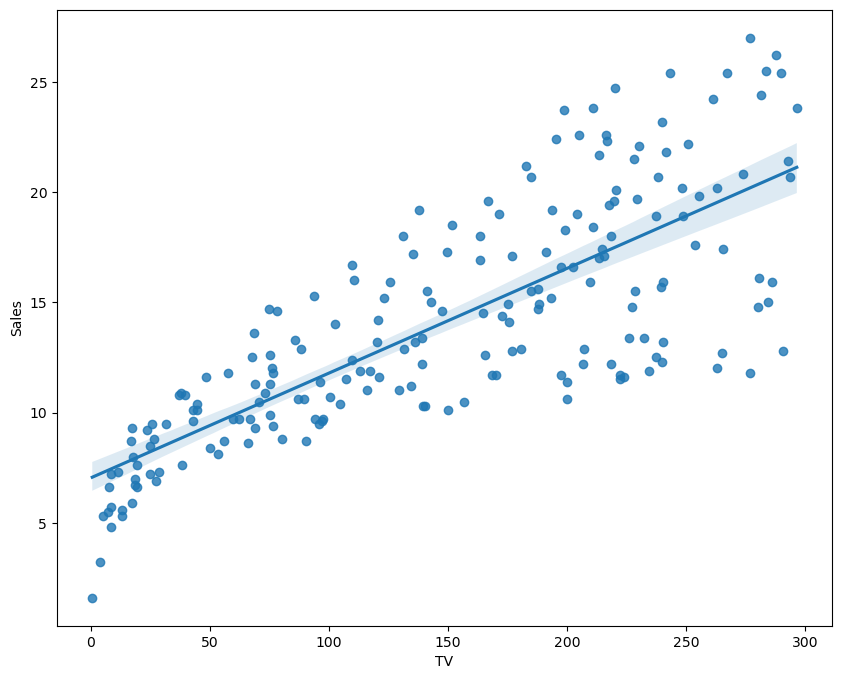

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(x='TV', y='Sales' , data=df)

<Axes: xlabel='TV', ylabel='Newspaper'>

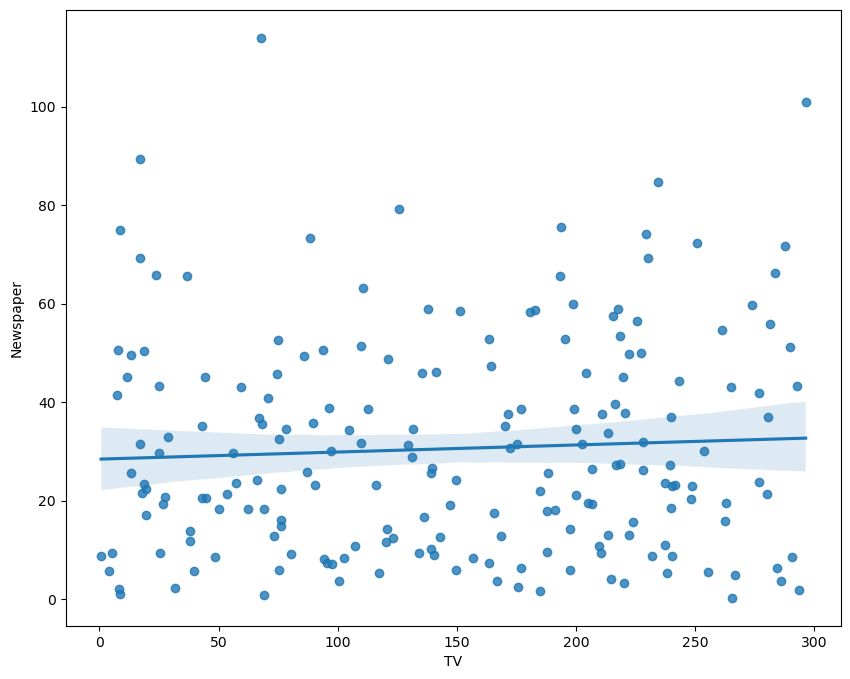

In [17]:
plt.figure(figsize=(10,8))
sns.regplot(x="TV", y='Newspaper', data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

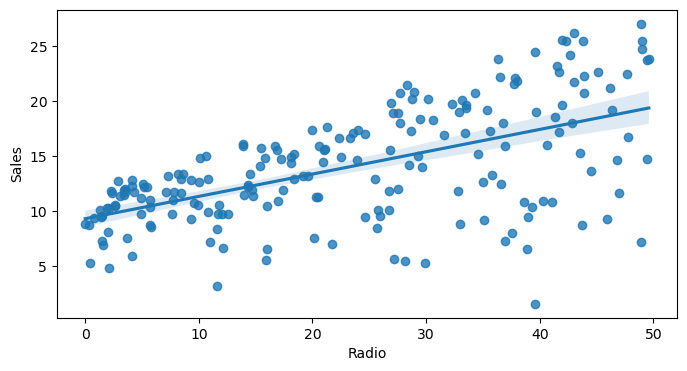

In [18]:
plt.figure(figsize=(8,4))
sns.regplot(x='Radio', y='Sales', data=df)

<Figure size 800x600 with 0 Axes>

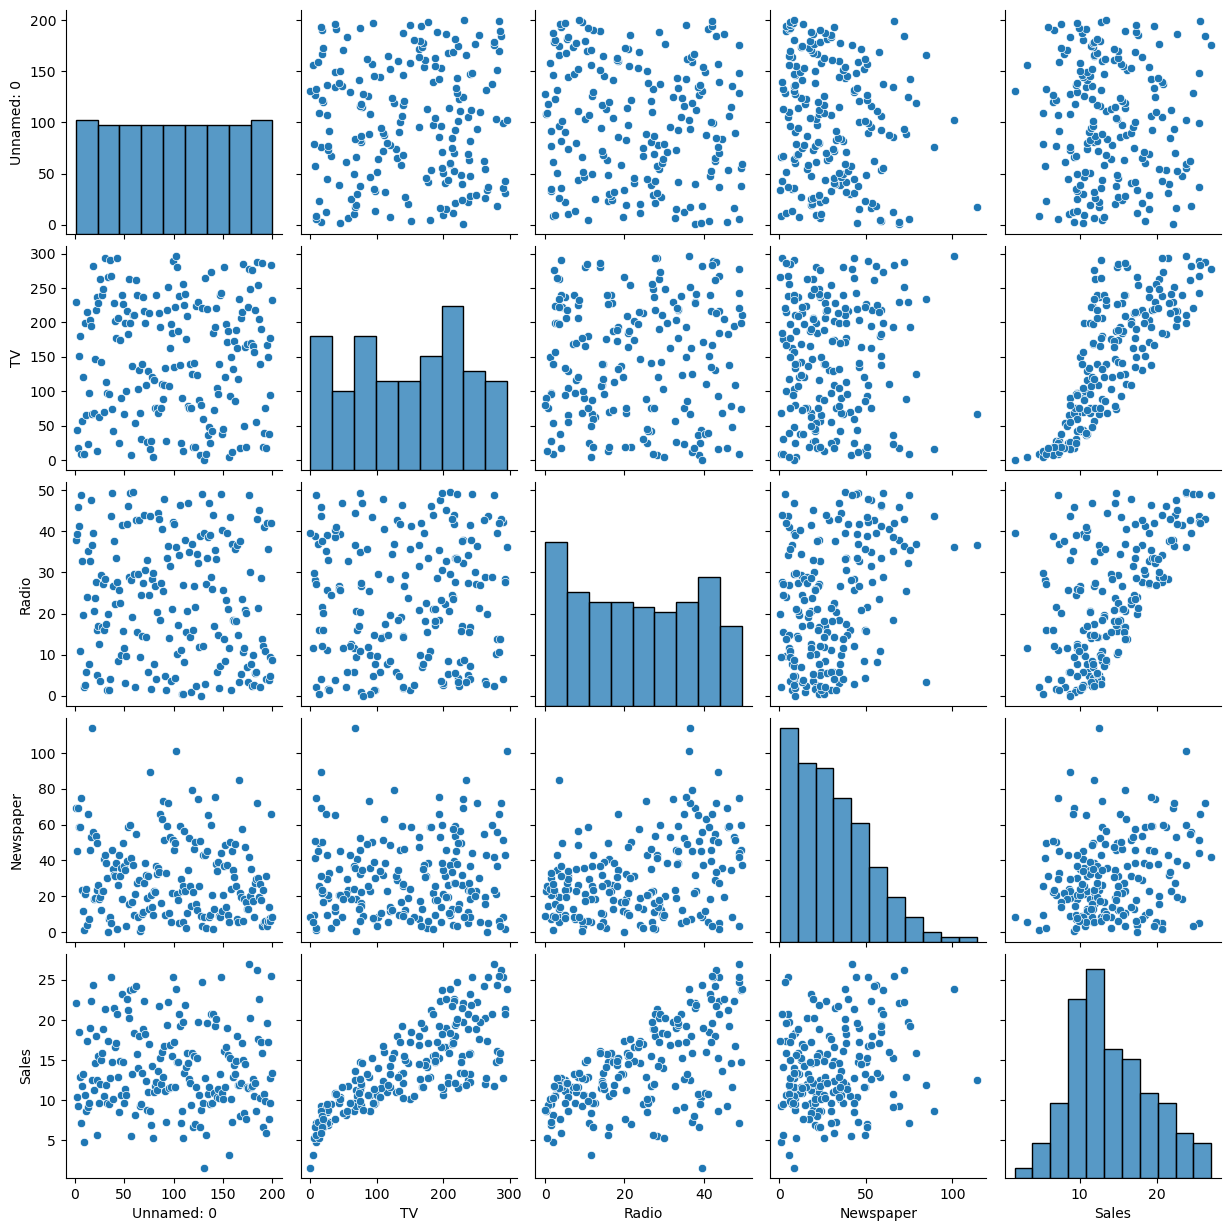

In [19]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

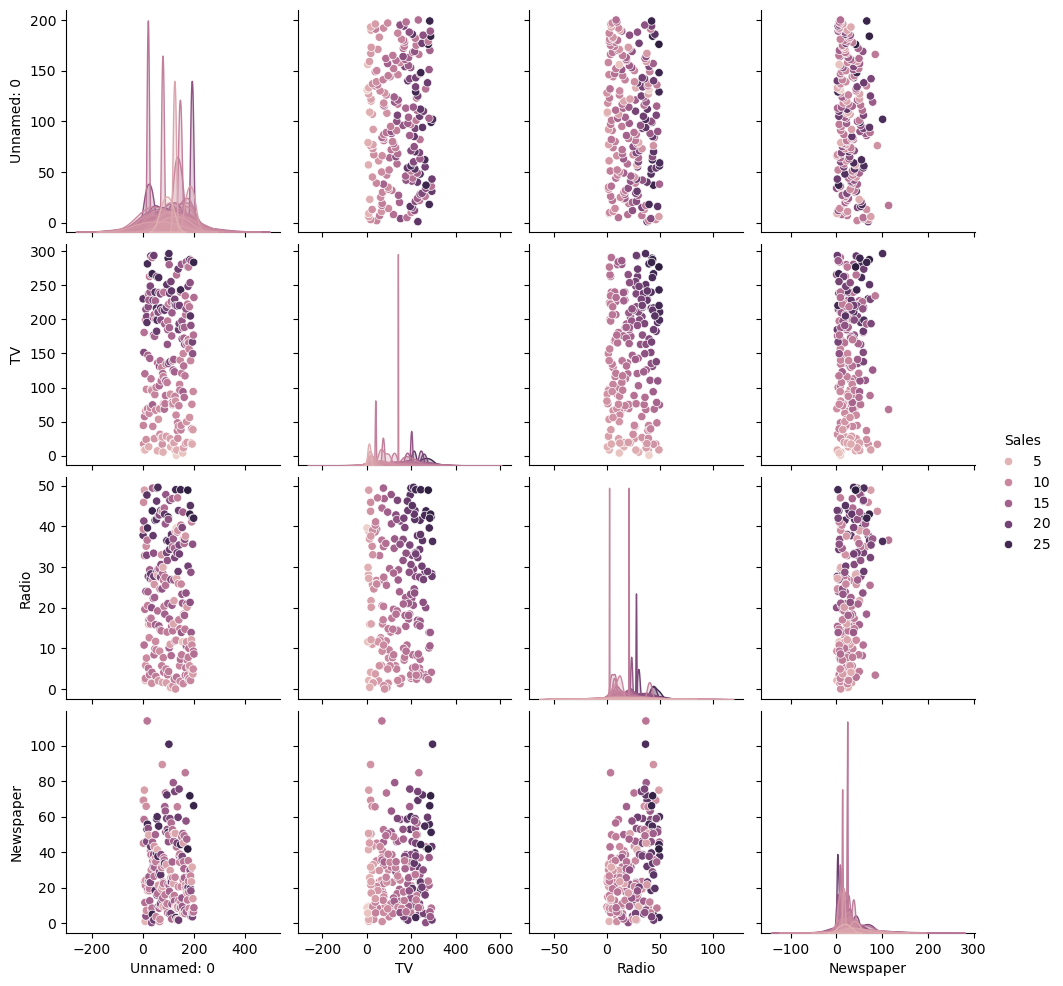

In [20]:
sns.pairplot(data=df, hue="Sales")

In [21]:
df.head(1)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
x=df[[	'Unnamed: 0',	'TV',	'Radio'	,'Newspaper'	,'Sales']]

In [24]:
y=df[['Sales']]

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)


In [29]:
from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 1.0
The test accuracy : 1.0


In [30]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

E:\Users\hi\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [31]:
random_f_pred = random_forest.predict(x_test)


In [32]:
r2_score(y_test,random_f_pred)


0.9991765042308647